In [17]:
#load packages
import pandas as pd
from pandas import Series,DataFrame

<b><font color="red">DATA EXPLORATION</font></b>

In [5]:
ls

instacart homework.ipynb  test_trips.csv            trip_items.csv
shoppers.csv              train_trips.csv


There are 4 csv files : the test/train samples and 2 others that will be used for building the model

In [9]:
trip_items = pd.read_csv("trip_items.csv")

In [10]:
trip_items.head()

,trip_id,item_id,item_department,item_needs_weighed
0,74363,73671,Beverages,1
1,74363,74185,Pantry,1
2,74363,77267,Snacks,1
3,74363,80625,Pantry,1
4,74363,81201,Produce,1


In [33]:
trip_items.describe()

,trip_id,item_id,item_needs_weighed
count,533671.000000,533671.000000,533671.000000
mean,106678.707479,96619.344592,0.523806
std,21548.377875,82367.760338,0.499433
min,74363.000000,29881.000000,0.000000
25%,87705.000000,42334.000000,0.000000
50%,104116.000000,79497.000000,1.000000
75%,124540.000000,103749.000000,1.000000
max,147561.000000,509896.000000,1.000000


This file has 5 columns and ~500k rows ; the features are the item type (Beverages,food,etc...), item_id (which looks like a regular id), the trip_id (which will make the link to the other file) and a last column : item_needs_weighed. This feature may reflect that some items needs to be weighted (you have a <b>weight adjustment</b> pricing)

A quick plot of item_needs_weighted shows that it looks more like a boolean variable, 0 means no need to be weighted and 1 means needs to be weighted

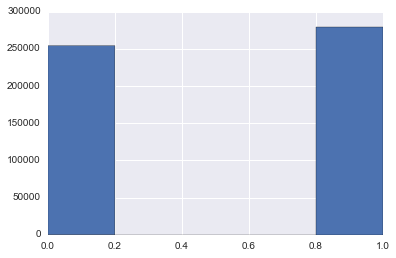

In [34]:
trip_items['item_needs_weighed'].hist(bins=5)

<font color="green">comments</font> : A look at the item distribution shows that the item the most ordered is Produce, which from the listing (and common sense) looks like fruit & vegetable

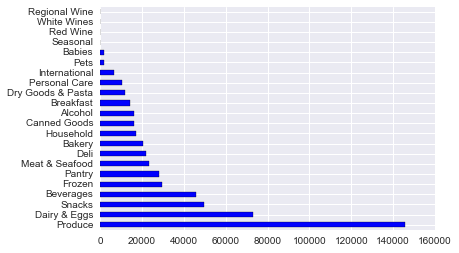

In [39]:
trip_items['item_department'].value_counts().plot(kind='barh')

In [42]:
#import visuaization packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
test= trip_items.groupby(['item_needs_weighed'])

In [47]:
test.describe()

trip_id        item_id  item_needs_weighed
item_needs_weighed                                                        
0                  count  254131.000000  254131.000000              254131
                   mean   107372.887471  117865.273599                   0
                   std     21513.733450  102955.277195                   0
                   min     74363.000000   29885.000000                   0
                   25%     88329.000000   42260.000000                   0
                   50%    105183.000000   81807.000000                   0
                   75%    125396.000000  111165.000000                   0
                   max    147561.000000  509896.000000                   0
1                  count  279540.000000  279540.000000              279540
                   mean   106047.625503   77304.580393                   1
                   std     21560.476707   50324.025984                   0
                   min     74363.000000   29881.000000                   1
                   25%     87086.000000   43118.000000                   1
                   50%    103104.000000   77372.500000                   1
                   75%    123899.000000   87901.000000                   1
                   max    147561.000000  452408.000000                   1

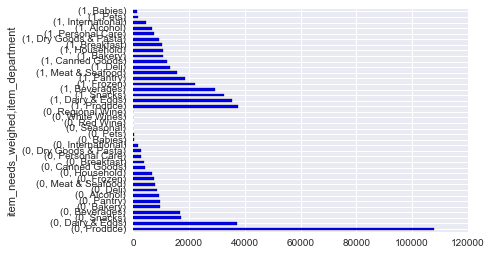

In [49]:
test['item_department'].value_counts().plot(kind='barh')

<font color="green">comments</font> : a majority of the produce items do not need to be weighted

In [22]:
shopper = pd.read_csv("shoppers.csv")

In [31]:
shopper.head()

,shopper_id,shopper_hired_date,shopper_birth_year
0,884,2014-01-22 14:06:24-08:00,1983
1,476,2013-09-24 20:12:53-07:00,1990
2,1056,2014-02-10 13:54:38-08:00,1988
3,770,2013-12-26 18:37:08-08:00,1985
4,524,2013-10-17 20:41:11-07:00,1957


<font color="green">comments</font> : This file has 3 columns and 303 rows. It gives information about the shopper_id, its DOB and when he was hired for the current course

In [32]:
shopper.describe()

,shopper_id,shopper_birth_year
count,303.000000,303.000000
mean,715.016502,1984.181518
std,405.707358,10.580348
min,17.000000,1876.000000
25%,382.500000,1981.000000
50%,685.000000,1987.000000
75%,1048.500000,1990.000000
max,1501.000000,2014.000000


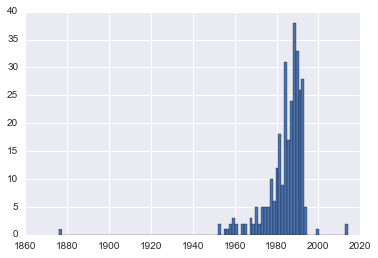

In [52]:
shopper["shopper_birth_year"].hist(bins=100)

<font color="green">comments</font> : so one of your shopper is really really old and some of them are really really young ...

In [62]:
test_shopper = shopper[shopper['shopper_birth_year'] > 1900]

In [63]:
test_shopper = test_shopper[shopper['shopper_birth_year']< 2010]

//anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [64]:
test_shopper.describe()

,shopper_id,shopper_birth_year
count,300.000000,300.000000
mean,712.486667,1984.343333
std,406.475079,8.243298
min,17.000000,1952.000000
25%,381.250000,1981.000000
50%,677.000000,1987.000000
75%,1047.250000,1990.000000
max,1501.000000,2000.000000


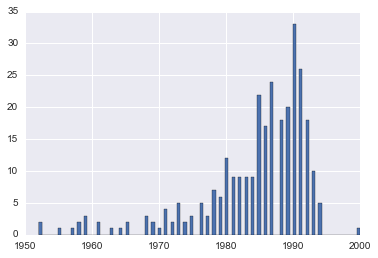

In [65]:
test_shopper["shopper_birth_year"].hist(bins=100)

In [74]:
test_shopper["shopper_hired_date"][0].split()[1]

'14:06:24-08:00'

<font color="green">comments</font> : the last part of this column is actually the time of the shopping time and that's what we need for displaying the final result

<b><font color="red">Look at the test/train sample</font></b>

In [67]:
test = pd.read_csv("test_trips.csv")

In [68]:
test.describe()

,trip_id,store_id,shopper_id
count,5460.000000,5460.000000,5460.000000
mean,139219.555678,2.820330,705.739927
std,4750.697286,1.778582,415.373985
min,131128.000000,1.000000,38.000000
25%,134923.000000,1.000000,367.000000
50%,139226.500000,3.000000,624.000000
75%,143265.250000,5.000000,1074.000000
max,147561.000000,6.000000,1501.000000


In [69]:
train = pd.read_csv("train_trips.csv")

In [70]:
train.describe()

,trip_id,store_id,shopper_id
count,23000.000000,23000.000000,23000.000000
mean,99927.553652,2.818348,530.788522
std,16545.247453,1.810721,309.162225
min,74363.000000,1.000000,17.000000
25%,85290.750000,1.000000,320.000000
50%,98259.500000,3.000000,502.000000
75%,113714.250000,5.000000,760.000000
max,131139.000000,6.000000,1371.000000


<b><font color='red'>Modeling</font></b>

The idea would take the features from trip_items dataframe :
    <ul>
    <li> Produce
    <li> needs to be weighted
    </ul>
then groupby these items by trip_id.
<br>
<br>
Then we can merge this new DF with the shopper dataframe to get additional features : the date and shopping time. I'm not sure if the DOB of the shoper is meaningful here.
I will have then a new dataframe with : Produce, need_to_be_weighted , the date of the course and its duration.

I would have used a logistic regression to train the model where the result is the duration time as a function of trip_id, where trip_id is a mapping of the features : Produce, needs_to_be_weighted, date_of the_course